In [1]:
import pandas as pd
import torch
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = "../../data/tiny-imagenet-200"

In [3]:
classes = pd.read_csv(f"{data_path}/words.txt", sep="\t", names=["id", "entity"])

In [4]:
train_images = []
train_label_ids = []

In [5]:
for f in os.walk(f"{data_path}/train/"):
    folders = sorted(f[1])
    for class_id in folders:
        # print(classes[classes['id'] == class_id]['entity'].values)
        # print(class_id)
        for f2 in os.walk(f"{data_path}/train/{class_id}/images"):
            image_paths = sorted(f2[2])
            for img_path in image_paths:
                img = cv2.imread(f"{data_path}/train/{class_id}/images/{img_path}")
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                train_images.append(img)
                train_label_ids.append(class_id)
    break

In [6]:
len(train_images)

100000

In [7]:
train_images = np.stack(train_images)
# for torch, should be about 4-5 gigabytes
train_images = torch.from_numpy(train_images).float()

In [15]:
import pickle

In [20]:
with open("dataset.pkl", "wb") as f:
    pickle.dump({
        "train": train_images,
        "labels": train_label_ids
    }, f)

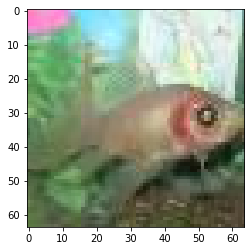

In [9]:
plt.imshow(train_images[0]/255)

In [81]:
def get_class_name(id):
    return df[df['id'] == id]

In [91]:
get_class_name(train_label_ids[-501])

,id,entity
50603,n09428293,"seashore, coast, seacoast, sea-coast"
